In [1]:
import os
import glob
import fnmatch
import pandas as pd
import numpy as np
import librosa #To deal with Audio files
import librosa.display
import matplotlib.pyplot as plt
import IPython.display as ipd
import math
import tensorflow as tf
import random

In [2]:
data_path = "Downloads//cats_dogs//train//"
print(os.listdir(data_path))

['cat', 'dog']


In [3]:
tarin_data = data_path 
normal_data = data_path  + "dog//"
murmur_data = tarin_data + 'cat//'

In [4]:
dog_paths=[]
cat_paths=[]
for dirname, _, filenames in os.walk('Downloads//cats_dogs//train//dog'):
    for filename in filenames:
        dog_paths+=[(os.path.join(dirname, filename))]
for dirname, _, filenames in os.walk('Downloads//cats_dogs//train//cat'):
    for filename in filenames:
        cat_paths+=[(os.path.join(dirname, filename))]
print(len(dog_paths),len(cat_paths))

85 125


In [5]:
def visulize_random_sample(folder_name):
    #to hear the audio sample
    random_sample             = np.random.randint(0,len(os.listdir(folder_name)))
    sample_sound              = os.listdir(folder_name)[random_sample]
    sample_address            = folder_name + sample_sound
    sample_sound, sample_rate = librosa.load(sample_address)
    sample_audio              = ipd.Audio(sample_sound, rate=sample_rate)
    return sample_audio

In [6]:
visulize_random_sample(normal_data)


In [7]:
visulize_random_sample(murmur_data)


In [8]:
# Choose random soud from normal folder
random_normal= np.random.randint(0,len(os.listdir(normal_data))) 
normal_sound = os.listdir(normal_data)[random_normal]
normal_sound_address = normal_data+normal_sound
normal_sound_sample,sample_rate = librosa.load(normal_sound_address)
ipd.Audio(normal_sound_sample,rate=sample_rate)


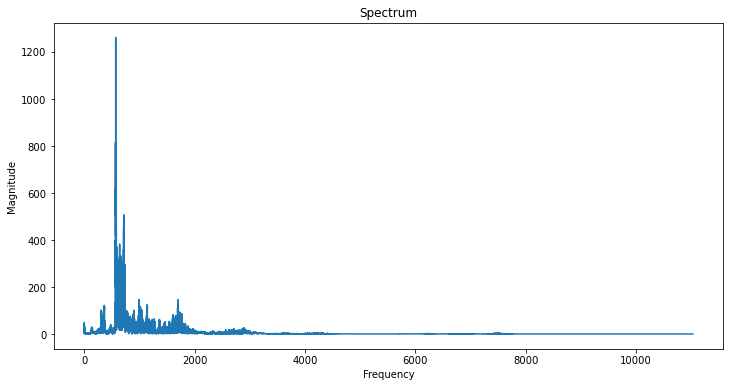

In [9]:
fft_normal = np.fft.fft(normal_sound_sample)
magnitude_normal = np.abs(fft_normal)
freq_normal = np.linspace(0,sample_rate, len(magnitude_normal)) 
half_freq = freq_normal[:int(len(freq_normal)/2)]
half_magnitude = magnitude_normal[:int(len(freq_normal)/2)]

plt.figure(figsize=(12,6))
plt.plot(half_freq,half_magnitude)
plt.title("Spectrum")
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.show()

STFT hop length duration is: 0.023219954648526078s
STFT window duration is: 0.09287981859410431s


Text(0.5, 1.0, 'Spectrogram')

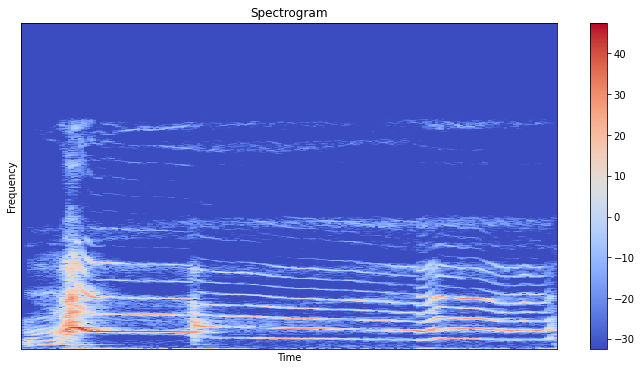

In [10]:
# STFT -> spectrogram
hop_length = 512 # in num. of samples
n_fft = 2048 # window in num. of samples

# calculate duration hop length and window in seconds
hop_length_duration = float(hop_length)/sample_rate
n_fft_duration = float(n_fft)/sample_rate

print("STFT hop length duration is: {}s".format(hop_length_duration))
print("STFT window duration is: {}s".format(n_fft_duration))

# perform stft
stft_normal = librosa.stft(normal_sound_sample, n_fft=n_fft, hop_length=hop_length)

# calculate abs values on complex numbers to get magnitude
spectrogram = np.abs(stft_normal)
log_spectrogram = librosa.amplitude_to_db(spectrogram)

# display spectrogram
plt.figure(figsize=(12,6))
librosa.display.specshow(log_spectrogram, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar()
#plt.set_cmap("YlOrBr")
plt.title("Spectrogram")

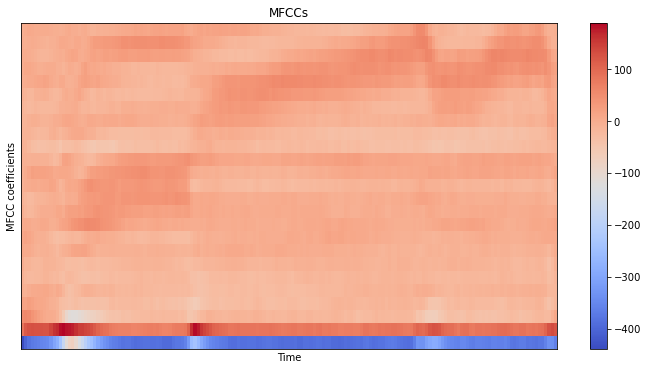

In [11]:
# MFCCs
# extract 25 MFCCs
MFCCs = librosa.feature.mfcc(y=normal_sound_sample, sr=sample_rate, n_fft=n_fft, hop_length=hop_length, n_mfcc=25)

# display MFCCs
plt.figure(figsize=(12,6))
librosa.display.specshow(MFCCs, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("MFCC coefficients")
plt.colorbar()
#plt.set_cmap("YlOrBr")
plt.title("MFCCs")

# show plots
plt.show()

In [12]:
  # Choose random soud from murmur folder
random_murmur= np.random.randint(0,len(os.listdir(murmur_data))) 
murmur_sound = os.listdir(murmur_data)[random_murmur]
murmur_sound_address = murmur_data+murmur_sound
murmur_sound_sample,sample_rate = librosa.load(murmur_sound_address)
ipd.Audio(murmur_sound_sample,rate=sample_rate)


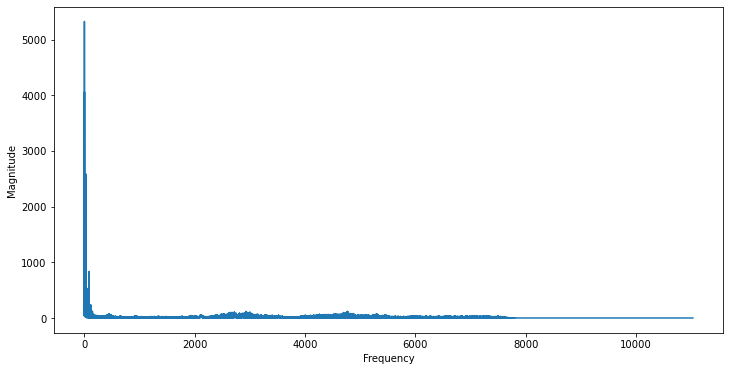

In [13]:
fft_murmur = np.fft.fft(murmur_sound_sample)
magnitude_murmur = np.abs(fft_murmur)
freq_murmur = np.linspace(0,sample_rate, len(magnitude_murmur)) 
half_freq = freq_murmur[:int(len(freq_murmur)/2)]
half_magnitude = magnitude_murmur[:int(len(freq_murmur)/2)]

plt.figure(figsize=(12,6))
plt.plot(half_freq,half_magnitude)
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.show()

STFT hop length duration is: 0.023219954648526078s
STFT window duration is: 0.09287981859410431s


Text(0.5, 1.0, 'Spectrogram_murmur')

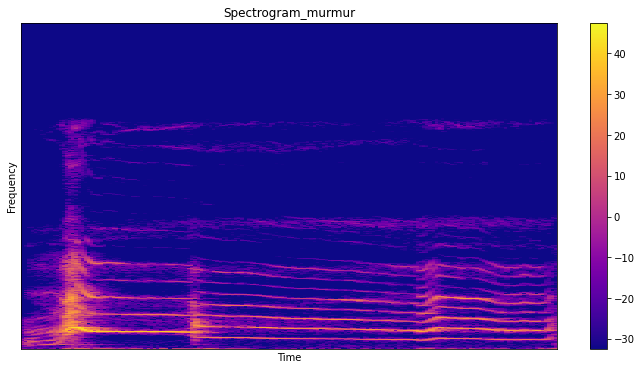

In [14]:
# STFT -> spectrogram
hop_length = 512 # in num. of samples
n_fft = 2048 # window in num. of samples

# calculate duration hop length and window in seconds
hop_length_duration = float(hop_length)/sample_rate
n_fft_duration = float(n_fft)/sample_rate

print("STFT hop length duration is: {}s".format(hop_length_duration))
print("STFT window duration is: {}s".format(n_fft_duration))

# perform stft
stft_murmur = librosa.stft(murmur_sound_sample, n_fft=n_fft, hop_length=hop_length)

# calculate abs values on complex numbers to get magnitude
spectrogram_murmur = np.abs(stft_murmur)
log_spectrogram_murmur = librosa.amplitude_to_db(spectrogram_murmur)

# display spectrogram
plt.figure(figsize=(12,6))
librosa.display.specshow(log_spectrogram, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar()
plt.set_cmap("plasma")
plt.title("Spectrogram_murmur")

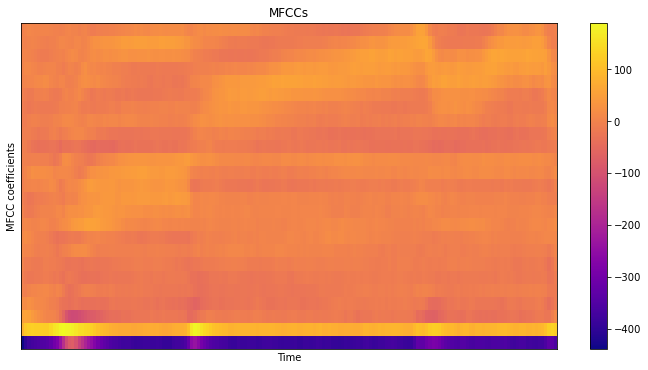

In [15]:
# MFCCs
# extract 25 MFCCs
MFCCs_murmur = librosa.feature.mfcc(y=murmur_sound_sample, sr=sample_rate, n_fft=n_fft, hop_length=hop_length, n_mfcc=25)

# display MFCCs
plt.figure(figsize=(12,6))
librosa.display.specshow(MFCCs, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("MFCC coefficients")
plt.colorbar()
plt.set_cmap("plasma")
plt.title("MFCCs")

# show plots
plt.show()

# Loading Data

In [16]:
def load_file_data (folder, file_names, duration=10, sr=22050):
    input_length=sr*duration
    data = []
    for file_name in file_names:
        try:
            sound_file=folder+file_name
            print ("load file ",sound_file)
            X, sr = librosa.load( sound_file, sr=sr, duration=duration) 
            dur = librosa.get_duration(y=X, sr=sr)
            # pad audio file same duration
            if (round(dur) < duration):
                print ("fixing audio lenght :", file_name)
                y = librosa.util.fix_length(X, input_length)                
            # extract normalized mfcc feature from data
            mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sr, n_mfcc=25).T,axis=0)             
        except Exception as e:
            print("Error encountered while parsing file: ", file_name)        
        feature = np.array(mfccs).reshape([-1,1])
        data.append(feature)
    return data

In [17]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

# Map label text to integer
CLASSES = ['dog','cat']
NB_CLASSES=len(CLASSES)

# Map integer value to text labels
label_to_int = {k:v for v,k in enumerate(CLASSES)}
print (label_to_int)
int_to_label = {v:k for k,v in label_to_int.items()}
print(int_to_label)

{'dog': 0, 'cat': 1}
{0: 'dog', 1: 'cat'}


In [18]:
# 22 KHz
SAMPLE_RATE = 22050
# seconds
MAX_SOUND_CLIP_DURATION=10

# Load normal sounds
normal_files = fnmatch.filter(os.listdir(normal_data), 'dog*.wav')
normal_sounds = load_file_data(folder=normal_data, file_names=normal_files, duration=MAX_SOUND_CLIP_DURATION)
normal_labels = [0 for _ in normal_sounds]  # Assign label 0 for normal sounds

# Load murmur sounds
murmur_files = fnmatch.filter(os.listdir(murmur_data), 'cat*.wav')
murmur_sounds = load_file_data(folder=murmur_data, file_names=murmur_files, duration=MAX_SOUND_CLIP_DURATION)
murmur_labels = [1 for _ in murmur_files]  # Assign label 1 for murmur sounds

# Fix the length of audio signals
fixed_normal_sounds = [librosa.util.fix_length(sound, size=MAX_SOUND_CLIP_DURATION * SAMPLE_RATE) for sound in normal_sounds]
fixed_murmur_sounds = [librosa.util.fix_length(sound, size=MAX_SOUND_CLIP_DURATION * SAMPLE_RATE) for sound in murmur_sounds]

load file  Downloads//cats_dogs//train//dog//dog_barking_0.wav
load file  Downloads//cats_dogs//train//dog//dog_barking_1.wav
load file  Downloads//cats_dogs//train//dog//dog_barking_10.wav
fixing audio lenght : dog_barking_10.wav
Error encountered while parsing file:  dog_barking_10.wav
load file  Downloads//cats_dogs//train//dog//dog_barking_100.wav
fixing audio lenght : dog_barking_100.wav
Error encountered while parsing file:  dog_barking_100.wav
load file  Downloads//cats_dogs//train//dog//dog_barking_101.wav
fixing audio lenght : dog_barking_101.wav
Error encountered while parsing file:  dog_barking_101.wav
load file  Downloads//cats_dogs//train//dog//dog_barking_102.wav
fixing audio lenght : dog_barking_102.wav
Error encountered while parsing file:  dog_barking_102.wav
load file  Downloads//cats_dogs//train//dog//dog_barking_103.wav
fixing audio lenght : dog_barking_103.wav
Error encountered while parsing file:  dog_barking_103.wav
load file  Downloads//cats_dogs//train//dog//do

In [19]:
####
X = np.concatenate((normal_sounds,murmur_sounds),0)
Y = np.concatenate((normal_labels,murmur_labels),0)

m=len(Y)
M=list(range(m))
random.seed(2021)
random.shuffle(M)

trainX=X[M[0:(m//5)*4]]
testX=X[M[(m//5)*4:]]
trainY=Y[M[0:(m//5)*4]]
testY=Y[M[(m//5)*4:]]

x_data = trainX
y_data = trainY
test_x = testX
test_y = testY

In [20]:
CLASSES


['dog', 'cat']

In [21]:
# shuffle - whether or not to shuffle the data before splitting. If shuffle=False then stratify must be None.
# split data into Train, Validation and Test
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, train_size=0.8, random_state=42, shuffle=True)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, train_size=0.8, random_state=42, shuffle=True)

In [22]:
print(y_train.shape,y_test.shape,y_val.shape,test_y.shape)


(107,) (34,) (27,) (42,)


In [23]:
# One-Hot encoding for classes
y_train = np.array(tf.keras.utils.to_categorical(y_train, len(CLASSES)))
y_test = np.array(tf.keras.utils.to_categorical(y_test, len(CLASSES)))
y_val = np.array(tf.keras.utils.to_categorical(y_val, len(CLASSES)))
test_y = np.array(tf.keras.utils.to_categorical(test_y, len(CLASSES)))

In [24]:
TRAIN_IMG_COUNT = 210
COUNT_0 = 85  #normal
COUNT_1 = 125 #murmur
weight_for_0 = TRAIN_IMG_COUNT / (2 * COUNT_0)
weight_for_1 = TRAIN_IMG_COUNT / (2 * COUNT_1)
class_weight = {0: weight_for_0, 1: weight_for_1,}
class_weight

{0: 1.2352941176470589, 1: 0.84}

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, LSTM, Bidirectional, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau, ModelCheckpoint,TensorBoard,ProgbarLogger
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping
from tensorflow.keras.regularizers import l2
from sklearn import metrics 
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [26]:
model = Sequential()

model.add(Bidirectional(LSTM(128, dropout=0.05, recurrent_dropout=0.20, return_sequences=True), input_shape = (25,1)))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Flatten())
model.add(Dense(2, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=Adam(1e-4), metrics=['acc'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirectiona  (None, 25, 256)          133120    
 l)                                                              
                                                                 
 dense (Dense)               (None, 25, 128)           32896     
                                                                 
 dropout (Dropout)           (None, 25, 128)           0         
                                                                 
 dense_1 (Dense)             (None, 25, 128)           16512     
                                                                 
 dense_2 (Dense)             (None, 25, 64)            8256      
                                                                 
 dense_3 (Dense)             (None, 25, 64)            4160      
                                                        

In [27]:
weight_saver = ModelCheckpoint('set_a_weights.h5', monitor='val_loss', 
                               save_best_only=True, save_weights_only=True)
annealer = LearningRateScheduler(lambda x: 1e-3 * 0.8**x)

In [28]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)


In [29]:
history=model.fit(x_train, y_train, 
                  batch_size=3, 
                  epochs=10,
                  class_weight=class_weight,
                  callbacks=[weight_saver, annealer],
                  validation_data=(x_val, y_val)) 

Epoch 1/10
36/36 [==============================] - 14s 179ms/step - loss: 0.5693 - acc: 0.7290 - val_loss: 0.4184 - val_acc: 0.8519 - lr: 0.0010
Epoch 2/10
36/36 [==============================] - 5s 134ms/step - loss: 0.3173 - acc: 0.8598 - val_loss: 0.2655 - val_acc: 0.8148 - lr: 8.0000e-04
Epoch 3/10
36/36 [==============================] - 5s 137ms/step - loss: 0.2165 - acc: 0.9346 - val_loss: 0.1751 - val_acc: 0.9259 - lr: 6.4000e-04
Epoch 4/10
36/36 [==============================] - 5s 137ms/step - loss: 0.1495 - acc: 0.9439 - val_loss: 0.1166 - val_acc: 0.9630 - lr: 5.1200e-04
Epoch 5/10
36/36 [==============================] - 5s 136ms/step - loss: 0.0838 - acc: 0.9720 - val_loss: 0.0939 - val_acc: 0.9259 - lr: 4.0960e-04
Epoch 6/10
36/36 [==============================] - 4s 123ms/step - loss: 0.0887 - acc: 0.9533 - val_loss: 0.0985 - val_acc: 1.0000 - lr: 3.2768e-04
Epoch 7/10
36/36 [==============================] - 5s 135ms/step - loss: 0.0926 - acc: 0.9626 - val_loss: 0.

<AxesSubplot:>

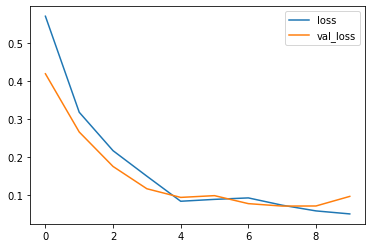

In [30]:
losses = pd.DataFrame(model.history.history)
losses[['loss','val_loss']].plot()

<AxesSubplot:>

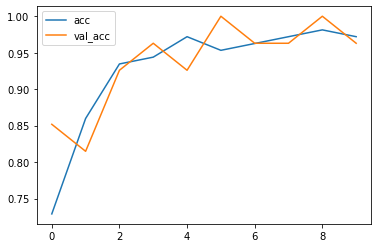

In [31]:
losses[['acc','val_acc']].plot()


In [32]:
# make a prediction
y_pred = model.predict(x_test, batch_size=5)
#check scores
scores = model.evaluate(x_test, y_test)
print ("Model evaluation accuracy: ", round(scores[1]*100),"%")

2/2 [==============================] - 1s 11ms/step - loss: 0.2002 - acc: 0.9706
Model evaluation accuracy:  97 %


In [33]:
model.save('heart_sounds.h5')


In [34]:
# prediction class 
y_pred = np.asarray(model.predict(x_test, batch_size=32))
y_pred = np.argmax(y_pred,axis=1)
print ("prediction test return :",y_pred[1], "-", int_to_label[y_pred[1]])


2/2 [==============================] - 0s 12ms/step
prediction test return : 0 - dog


In [35]:
def preprocessing (file_path, duration=10, sr=22050):
    input_length=sr*duration
    process_file=[]
    X, sr = librosa.load(file_path, sr=sr, duration=duration) 
    dur = librosa.get_duration(y=X, sr=sr)
    # pad audio file same duration
    if (round(dur) < duration):
        y = librosa.util.fix_length(X, input_length)                
        mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sr, n_mfcc=40, n_fft=512,hop_length=2048).T,axis=0)
        feature = np.array(mfccs).reshape([-1,1])
        process_file.append(feature)
        process_file_array = np.asarray(process_file)
    return process_file_array

In [36]:
####
y_pred = np.asarray(model.predict(x_test, batch_size=32))
PRED = y_pred.argmax(axis=1)
TRUE = y_test.argmax(axis=1)

target_names = ["dog", "cat"]
print(classification_report(TRUE, PRED, target_names=target_names, digits=4))


2/2 [==============================] - 0s 18ms/step
              precision    recall  f1-score   support

         dog     1.0000    0.9412    0.9697        17
         cat     0.9444    1.0000    0.9714        17

    accuracy                         0.9706        34
   macro avg     0.9722    0.9706    0.9706        34
weighted avg     0.9722    0.9706    0.9706        34

